# PERCEPTRON MODEL

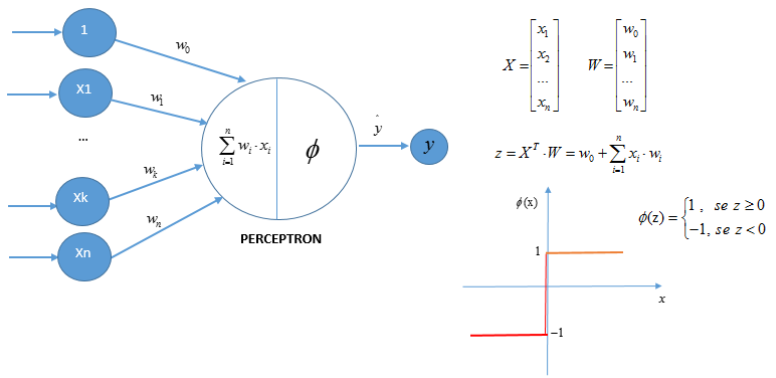

#### 1) Implementation of Perceptron Algorithm

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class Perceptron:
    def __init__(self, eta = 0.01, n_iter = 10):
        self.eta = eta
        self.n_iter = n_iter
    
    # make random initialization of vector of weights
    def inicialize_weights(self, x):        
        self.w_ = np.random.uniform(low = -0.5, high = 0.5, size = x.shape[1] + 1)
        self.errors_ = []
    
    # linear combination
    def input_net(self, x):
        return np.dot(x, self.w_[1:]) + self.w_[0]
    
    # apply activation function to predict
    def predict(self, x):
        return np.where(self.input_net(x)>=0, 1, -1)

    # process of training
    def fit(self, x, y):
        self.inicialize_weights(x)
        # iterative process by epochs
        for _ in range(self.n_iter):
            error = 0    # accumulative error by iteration
            for xi, yi in zip(x, y):
                y_hat = self.predict(xi)
                delta_w = self.eta * (yi - y_hat)
                self.w_[0] += delta_w
                self.w_[1:] += delta_w * xi

                if delta_w != 0:
                    error += 1
            self.errors_.append(error)
    

#### 2) Preprocessing 

In [5]:
# load dataset
dataset = pd.read_csv("dataset/weather_data2.csv")
dataset.columns = ["Temperature", "Humidity", "Wind_Speed", "Cloud_Cover", "Pressure", "Rain"]
dataset.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


In [7]:
# split independent and dependent variables
x = dataset.iloc[:100, [1, 3]].values
y = dataset.iloc[:100, -1].values

In [8]:
x[:5]

array([[89.59264065, 50.50169383],
       [46.48970404,  4.99005293],
       [83.07284289, 14.85578394],
       [74.36775792, 67.25528206],
       [96.85882241, 47.67644428]])

In [9]:
y = np.where(y == 'rain', -1, 1)
y

array([-1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

#### 3) Exploratory Analysis of data

In [10]:
def explore_axis(x):
    plt.scatter(x[:50, 0], x[:50, 1], color = 'red', marker = 'o', label = 'rain')
    plt.scatter(x[50:100, 0], x[50:100, 1], color = 'blue', marker = 'x', label = 'no rain')
    plt.xlabel('Humidity')
    plt.ylabel('Cloud-Cover')
    plt.legend(loc = 'upper left')
    plt.show()

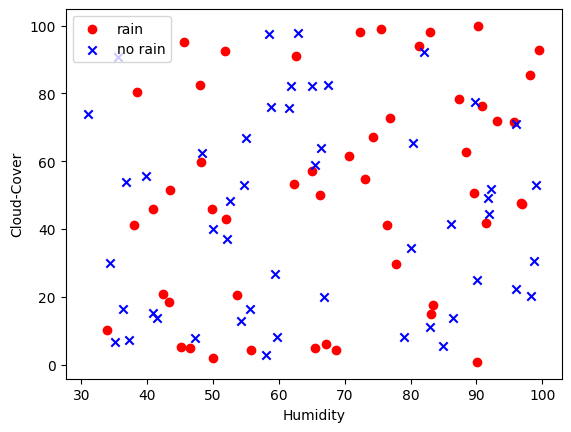

In [11]:
explore_axis(x)

#### 4) Training step

In [12]:
# training process
neuron = Perceptron(eta = 0.01, n_iter = 10)
neuron.fit(x, y)

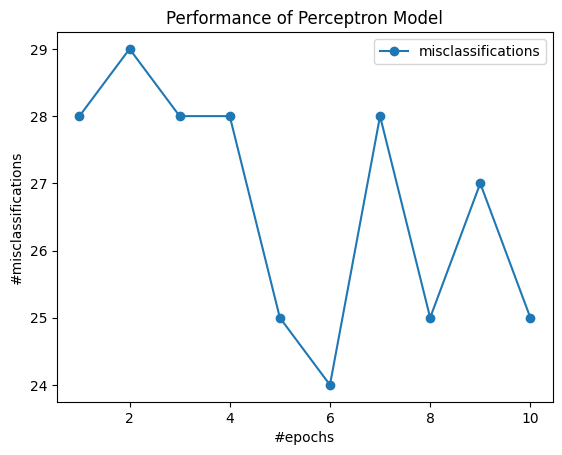

In [13]:
# plot results of training
plt.plot(range(1, len(neuron.errors_)+1), neuron.errors_, marker = 'o', label = "misclassifications")
plt.title("Performance of Perceptron Model")
plt.xlabel("#epochs")
plt.ylabel("#misclassifications")
plt.legend(loc = "upper right")
plt.show()

Check the decision boundary of perceptron

In [ ]:
from matplotlib.colors import ListedColormap

# plot the decision region of perceptron
def plot_decision_regions(x, y, classifier, resolution = 0.01):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                          np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha = 0.5, cmap = cmap)                                        
    plt.xlim(xx1.min(), xx1.max())                                        
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, classe in enumerate(np.unique(y)):
        plt.scatter(x[y == classe, 0], x[y == classe, 1], alpha = 0.8, 
                    color = cmap(idx), marker = markers[idx], label = classe)                


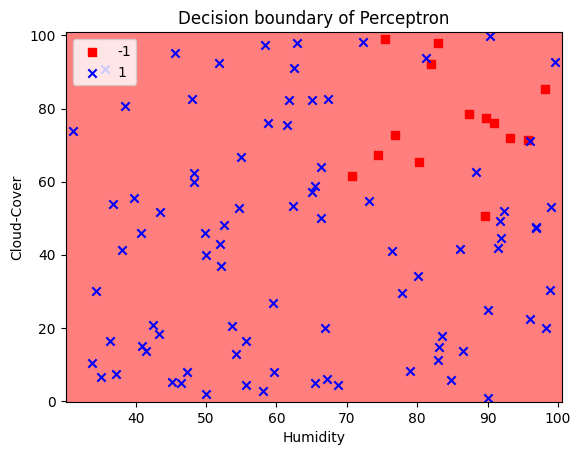

In [20]:
plot_decision_regions(x, y, neuron)
plt.xlabel('Humidity')
plt.ylabel('Cloud-Cover')
plt.legend(loc = 'upper left')
plt.title('Decision boundary of Perceptron')
plt.show()

#### 5) Explicit the model

In [21]:
neuron.w_

array([1.0943129 , 2.26101084, 0.3637471 ])

In [24]:
print("Percetron classifier model: ")
print(f"rain = {neuron.w_[0]:.4f} + {neuron.w_[1]:.4f} * Humidity + {neuron.w_[2]:.4f} * Cloud-Cover")

Percetron classifier model: 
rain = 1.0943 + 2.2610 * Humidity + 0.3637 * Cloud-Cover


In [23]:
new_point = np.array([5.0, 3.0])
pred = neuron.predict(new_point)
print("class = ", pred)

class =  1
